# Assignment: More Matplotlib

In [67]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## Problem 1: Line plots

In [3]:
import pooch
POOCH = pooch.create(
    path=pooch.os_cache("noaa-data"),
    # Use the figshare DOI
    base_url="doi:10.5281/zenodo.5553029/",
    registry={
        "HEADERS.txt": "md5:2a306ca225fe3ccb72a98953ded2f536",
        "CRND0103-2016-NY_Millbrook_3_W.txt": "md5:eb69811d14d0573ffa69f70dd9c768d9",
        "CRND0103-2017-NY_Millbrook_3_W.txt": "md5:b911da727ba1bdf26a34a775f25d1088",
        "CRND0103-2018-NY_Millbrook_3_W.txt": "md5:5b61bc687261596eba83801d7080dc56",
        "CRND0103-2019-NY_Millbrook_3_W.txt": "md5:9b814430612cd8a770b72020ca4f2b7d",
        "CRND0103-2020-NY_Millbrook_3_W.txt": "md5:cd8de6d5445024ce35fcaafa9b0e7b64"
    },
)


import pandas as pd

with open(POOCH.fetch("HEADERS.txt")) as fp:
    data = fp.read()
lines = data.split('\n')
headers = lines[1].split(' ')

dframes = []
for year in range(2016, 2019):
    fname = f'CRND0103-{year}-NY_Millbrook_3_W.txt'               
    df = pd.read_csv(POOCH.fetch(fname), parse_dates=[1],
                     names=headers, header=None, sep='\s+',
                     na_values=[-9999.0, -99.0])
    dframes.append(df)

df = pd.concat(dframes)
df = df.set_index('LST_DATE')
df

#########################################################
#### BELOW ARE THE VARIABLES YOU SHOULD USE IN THE PLOTS!
#### (numpy arrays)  
#### NO PANDAS ALLOWED!
#########################################################

t_daily_min = df.T_DAILY_MIN.values
t_daily_max = df.T_DAILY_MAX.values
t_daily_mean = df.T_DAILY_MEAN.values
p_daily_calc = df.P_DAILY_CALC.values
soil_moisture_5 = df.SOIL_MOISTURE_5_DAILY.values
soil_moisture_10 = df.SOIL_MOISTURE_10_DAILY.values
soil_moisture_20 = df.SOIL_MOISTURE_20_DAILY.values
soil_moisture_50 = df.SOIL_MOISTURE_50_DAILY.values
soil_moisture_100 = df.SOIL_MOISTURE_100_DAILY.values
date = df.index.values

In [6]:
units = lines[2].split(' ')
for name, unit in zip(headers, units):
    print(f'{name}: {unit}')

WBANNO: XXXXX
LST_DATE: YYYYMMDD
CRX_VN: XXXXXX
LONGITUDE: Decimal_degrees
LATITUDE: Decimal_degrees
T_DAILY_MAX: Celsius
T_DAILY_MIN: Celsius
T_DAILY_MEAN: Celsius
T_DAILY_AVG: Celsius
P_DAILY_CALC: mm
SOLARAD_DAILY: MJ/m^2
SUR_TEMP_DAILY_TYPE: X
SUR_TEMP_DAILY_MAX: Celsius
SUR_TEMP_DAILY_MIN: Celsius
SUR_TEMP_DAILY_AVG: Celsius
RH_DAILY_MAX: %
RH_DAILY_MIN: %
RH_DAILY_AVG: %
SOIL_MOISTURE_5_DAILY: m^3/m^3
SOIL_MOISTURE_10_DAILY: m^3/m^3
SOIL_MOISTURE_20_DAILY: m^3/m^3
SOIL_MOISTURE_50_DAILY: m^3/m^3
SOIL_MOISTURE_100_DAILY: m^3/m^3
SOIL_TEMP_5_DAILY: Celsius
SOIL_TEMP_10_DAILY: Celsius
SOIL_TEMP_20_DAILY: Celsius
SOIL_TEMP_50_DAILY: Celsius
SOIL_TEMP_100_DAILY: Celsius
: 


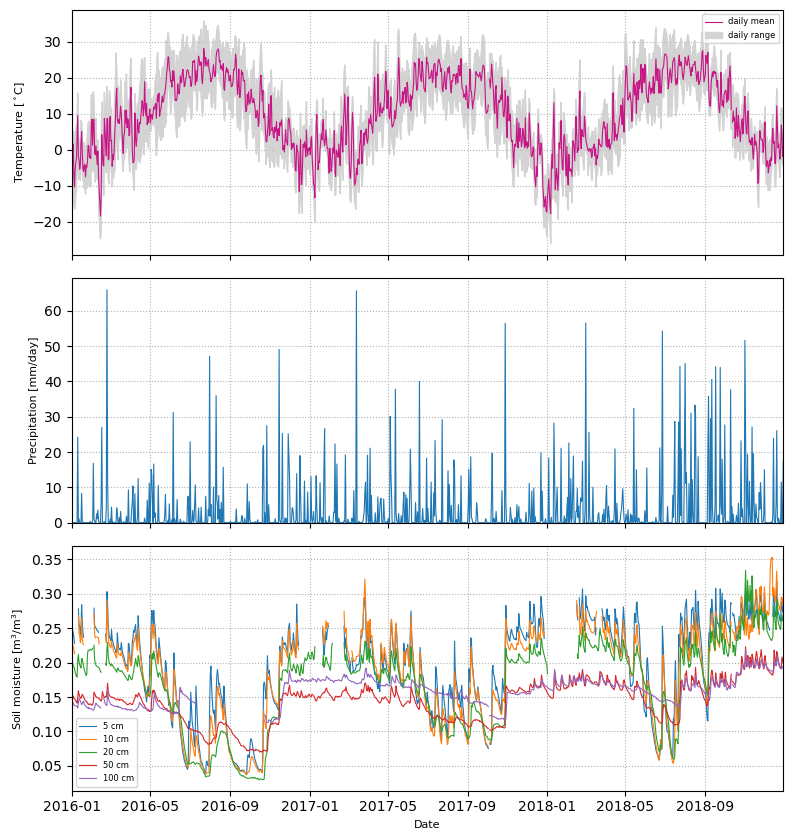

In [171]:
# TO DO
# # need daily mean before daily range
# make daily range legend thick


legendFontSize = 6

fig, ax = plt.subplots(figsize=(8,8.5), nrows=3, sharex=True)

ax[0].plot(date,t_daily_max, color='lightgrey',linewidth=0.8)
ax[0].plot(date,t_daily_min, color='lightgrey',linewidth=0.8)
ax[0].plot(date,t_daily_mean,color='mediumvioletred', label='daily mean',linewidth=0.8)
ax[0].fill_between(date, t_daily_max, t_daily_min, color='lightgrey',label='daily range')


ax[0].set_yticks([-20,-10,0,10,20,30])
ax[0].grid(linestyle=':')
ax[0].legend(loc='upper right',fontsize=legendFontSize) # need daily mean before daily range
ax[0].set_ylabel('Temperature [$^\circ$C]', fontsize=8)

ax[1].plot(date,p_daily_calc,linewidth=0.8)
ax[1].grid(linestyle=':')
ax[1].set_ylim(bottom=0)
ax[1].set_ylabel('Precipitation [mm/day]', fontsize=8)

ax[2].plot(date,soil_moisture_5, label='5 cm',linewidth=0.8)
ax[2].plot(date,soil_moisture_10, label='10 cm',linewidth=0.8)
ax[2].plot(date,soil_moisture_20, label='20 cm',linewidth=0.8)
ax[2].plot(date,soil_moisture_50, label='50 cm',linewidth=0.8)
ax[2].plot(date,soil_moisture_100, label='100 cm',linewidth=0.8)
ax[2].grid(linestyle=':')
ax[2].set_ylabel('Soil moisture [m$^3$/m$^3$]', fontsize=8) 
ax[2].set_xlim(left=np.min(date),right=np.max(date))
ax[2].set_xlabel('Date', fontsize=8)
ax[2].legend(loc='lower left',fontsize=legendFontSize)

fig.tight_layout()
# ax.set_yticks(np.arange(-1,1.1,0.2), minor=True) # right-excl, so set right to greater than 1.0, and spacing is 0.2
# ax[0].grid(which = 'minor') #, linestyle = '..')


# fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, constrained_layout=True)

## Problem 2: Contour Plots

In [68]:
import xarray as xr
ds_url = 'http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCEP-NCAR/.CDAS-1/.MONTHLY/.Diagnostic/.surface/.temp/dods'
ds = xr.open_dataset(ds_url, decode_times=False)

#########################################################
#### BELOW ARE THE VARIABLES YOU SHOULD USE IN THE PLOTS!
#### (numpy arrays) 
#### NO XARRAY ALLOWED!
#########################################################

temp = ds.temp[-1].values - 273.15
lon = ds.X.values
lat = ds.Y.values

In [98]:
temp.shape

(94, 192)

Text(0.5, 1.0, 'Zonal Mean Temperature')

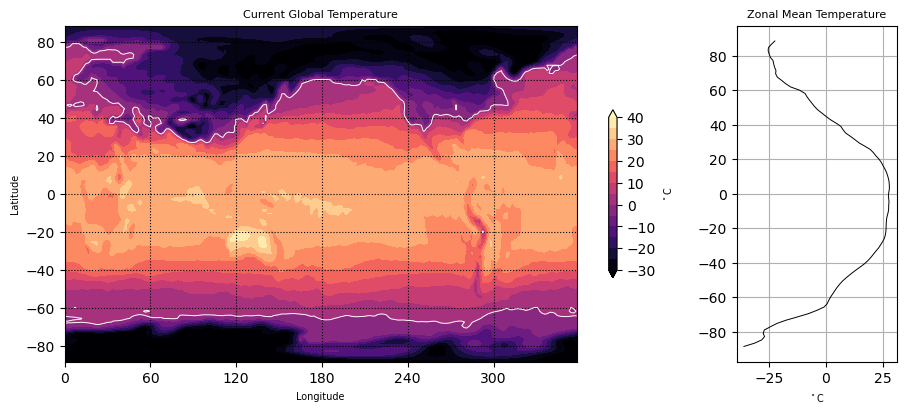

In [138]:
# TO DO
# Adjust tick marks on x-axes, y-axes, and colorbar


fig = plt.figure()
ax1 = fig.add_axes([0,0,1,0.7])
ax2 = fig.add_axes([1.05,0,0.25,0.7])

clevels = np.arange(-30,40.1,5)

cp = ax1.contourf(lon,lat,temp,clevels, cmap='magma', extend='both')
ax1.set_xticks([0,60,120,180,240,300]) 
ax1.set_ylabel('Latitude', fontsize=7)
ax1.set_xlabel('Longitude', fontsize=7)
ax1.set_title('Current Global Temperature', fontsize=8)
ax1.grid(linestyle=':',color='k')
cb = fig.colorbar(cp, shrink=0.5)
ax1.contour(lon,lat,temp,cmap='seismic',levels=0,linewidths=0.7)

cb.set_label(label='$^\circ$C',fontsize=7)

tempM = np.zeros(len(lat))

for i in range(0,len(tempM)):
    tempM[i]=np.mean(temp[i,:])

ax2.plot(tempM,lat,color='k',linewidth=0.7)
ax2.set_yticks([-80,-60,-40,-20,0,20,40,60,80])
ax2.grid()
ax2.set_xlabel('$^\circ$C', fontsize=7)
ax2.set_title('Zonal Mean Temperature', fontsize=8)

## Problem 3: Scatter plots

In [139]:
fname = pooch.retrieve(
    "https://rabernat.github.io/research_computing/signif.txt.tsv.zip",
    known_hash='22b9f7045bf90fb99e14b95b24c81da3c52a0b4c79acf95d72fbe3a257001dbb',
    processor=pooch.Unzip()
)[0]

earthquakes = np.genfromtxt(fname, delimiter='\t')
depth = earthquakes[:, 8]
magnitude = earthquakes[:, 9]
latitude = earthquakes[:, 20]
longitude = earthquakes[:, 21]

Unzipping contents of '/home/ceb2268/.cache/pooch/031a30a92d6a3a2680d86514a24e9321-signif.txt.tsv.zip' to '/home/ceb2268/.cache/pooch/031a30a92d6a3a2680d86514a24e9321-signif.txt.tsv.zip.unzip'


In [140]:
import matplotlib.colors as colors

Text(0, 0.5, 'Latitude ($^\\circ$)')

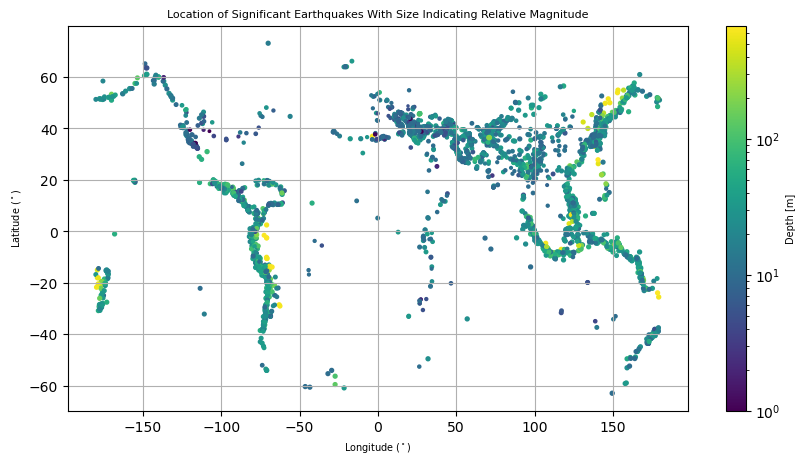

In [154]:
fig, ax = plt.subplots(figsize=(10,5))
splot = ax.scatter(longitude,latitude, c=depth, s=magnitude,norm=colors.LogNorm())
cb = fig.colorbar(splot)
cb.set_label(label='Depth [m]',fontsize=7)
ax.grid()
ax.set_title('Location of Significant Earthquakes With Size Indicating Relative Magnitude', fontsize=8)
ax.set_xlabel('Longitude ($^\circ$)', fontsize=7)
ax.set_ylabel('Latitude ($^\circ$)', fontsize=7)
# fig.colorbar(pc1, aspect=2, label='wide colorbar')